# Visualization of Multiple Linear Regression

In [1]:
import numpy as np
x = [[150,100],[159,200],[170,350],[175,400],[179,500],[180,180],[189,159],[199,110],[199,400],[199,230],[235,120],[239,340],[239,360],[249,145],[249,400]]
Y= [0.73,1.39,2.03,1.45,1.82,1.32,0.83,0.53,1.95,1.27,0.49,1.03,1.24,0.55,1.3]

In [3]:
import pandas as pd
df = pd.DataFrame(x,columns=['Price','AdSpends'])
df['Sales'] = pd.Series(Y)
df

,Price,AdSpends,Sales
0,150,100,0.73
1,159,200,1.39
2,170,350,2.03
3,175,400,1.45
4,179,500,1.82
5,180,180,1.32
6,189,159,0.83
7,199,110,0.53
8,199,400,1.95
9,199,230,1.27


In [4]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
model = smf.ols(formula = 'Sales ~ Price + AdSpends',data = df)
results_formula = model.fit()
results_formula.params

Intercept    1.633842
Price       -0.006379
AdSpends     0.003161
dtype: float64

In [5]:
## Prepare the data for Visualization

In [7]:
x_surf,Y_surf = np.meshgrid(np.linspace(df.Price.min(),df.Price.max(),100),np.linspace(df.AdSpends.min(),df.AdSpends.max(),100))
onlyX = pd.DataFrame({'Price':x_surf.ravel(),'AdSpends':Y_surf.ravel()})
fittedY = results_formula.predict(exog=onlyX)

In [8]:
## Convert the reult into array

In [9]:
fittedY = np.array(fittedY)

In [10]:
## Visualize the data for Multiple Linear Regression

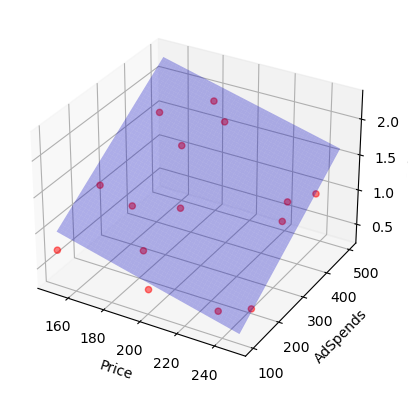

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Price'],df['AdSpends'],df['Sales'],c='red',marker='o',alpha=0.5)
ax.plot_surface(x_surf,Y_surf,fittedY.reshape(x_surf.shape),color='b',alpha =0.3)
ax.set_xlabel('Price')
ax.set_ylabel('AdSpends')
ax.set_zlabel('Sales')
plt.show()